# TV Shows and Movies on Netflix

The dataset consists of tv shows and movies available on Netflix as of 2019: https://www.kaggle.com/shivamb/netflix-shows

This notebook conducts exploratory analysis using plotly and other visualization libraries.

(Note: view the notebook with nbviewer to see the plotly charts. Github doesn't include the embedded HTML/JavaScript that makes up a plotly graph.)

In [18]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import squarify
from sklearn.preprocessing import MultiLabelBinarizer
import networkx as nx
from IPython.display import Markdown
def bold(string):
    display(Markdown(string))

In [2]:
df = pd.read_csv('.../netflix_titles_nov_2019.csv')
df.head(n=2)

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie


In [6]:
df.shape

(5837, 12)

In [7]:
df.isnull().sum()

show_id            0
title              0
director        1901
cast             556
country          427
date_added       642
release_year       0
rating            10
duration           0
listed_in          0
description        0
type               0
dtype: int64

In [77]:
temp0 = df.type.value_counts().reset_index()
temp0.columns = ['Type', 'Count']
fig = px.pie(temp0, values='Count', names='Type', color_discrete_sequence=px.colors.sequential.RdBu, title='Content Distribution by Type')
fig.show()

In [79]:
temp1 = df[(df.type=='Movie') & (df.release_year>1999)].release_year.value_counts().reset_index()
temp1.columns = ['ReleaseYear', 'Count']
temp2 = df[(df.type=='TV Show') & (df.release_year>1999)].release_year.value_counts().reset_index()
temp2.columns = ['ReleaseYear', 'Count']

trace1 = go.Bar(x=temp1.ReleaseYear, y=temp1.Count, name='Movie', marker=dict(color='rgb(0,0,139)'))
trace2 = go.Bar(x=temp2.ReleaseYear, y=temp2.Count, name='TV Show', marker=dict(color='rgb(255,99,71)'))
data = [trace1, trace2]
layout = go.Layout(barmode='group', template= "plotly_dark",title = 'Movies and TV Shows Over Time' , xaxis = dict(title = 'Release Year'), yaxis = dict(title = 'Count'))
fig = go.Figure(data=data, layout=layout)
fig.show()

The popularity of TV shows increasing can be seen above, especially in the last two years. In 2019, the number of TV shows released outnumbered movies for the first time on Netflix. This could indicate that longform storytelling is gaining traction for today's consumers and as a result, the quality of TV shows being made is getting better. People enjoy "binge watching" a show that spans multiple seasons versus a movie which may not offer an elongated watching experience. 

In [79]:
pie = df.country.value_counts().reset_index()
pie.columns = ['Country', 'Count']
pie.loc[pie['Count'] < 50, 'Country'] = 'Other countries'
fig = px.pie(pie, values='Count', names='Country', title='Titles by Country')
fig.show()

About half of the content on Netflix is from US and India. This suggests that the entertainment industries in those countries are highly lucrative, hence the supply is higher compared to other countries. 

In [87]:
temp4 = df[(df.country=='United States') & (df.release_year>1999)].release_year.value_counts().reset_index()
temp4.columns = ['ReleaseYear', 'Count']
temp5 = df[(df.country=='India') & (df.release_year>1999)].release_year.value_counts().reset_index()
temp5.columns = ['ReleaseYear', 'Count']

trace1 = go.Bar(x=temp4.ReleaseYear, y=temp4.Count, name='United States', marker=dict(color='rgb(0,0,139)'))
trace2 = go.Bar(x=temp5.ReleaseYear, y=temp5.Count, name='India', marker=dict(color='rgb(255,99,71)'))
data = [trace1, trace2]
layout = go.Layout(barmode='group', template= "plotly_dark",title = 'Content Released from US and India Over Time' , xaxis = dict(title = 'Release Year'), yaxis = dict(title = 'Count'))
fig = go.Figure(data=data, layout=layout)
fig.show()

In [83]:
temp = temp1 = df[df.type=='Movie'].rating.value_counts().reset_index()
temp1.columns = ['Rating', 'Count']
temp2 = df[df.type=='TV Show'].rating.value_counts().reset_index()
temp2.columns = ['Rating', 'Count']

trace1 = go.Bar(x=temp1.Rating, y=temp1.Count, name='Movie', marker=dict(color='rgb(0,0,139)'))
trace2 = go.Bar(x=temp2.Rating, y=temp2.Count, name='TV Show', marker=dict(color='rgb(255,99,71)'))
data = [trace1, trace2]
layout = go.Layout(barmode='group', template= "plotly_dark",title = 'Ratings by Type' , xaxis = dict(title = 'Rating'), yaxis = dict(title = 'Count'))
fig = go.Figure(data=data, layout=layout)
fig.show()

In [84]:
temp4 = df[df.country=='United States'].rating.value_counts().reset_index()
temp4.columns = ['Rating', 'Count']
temp5 = df[df.country=='India'].rating.value_counts().reset_index()
temp5.columns = ['Rating', 'Count']

trace1 = go.Bar(x=temp4.Rating, y=temp4.Count, name='United States', marker=dict(color='rgb(0,0,139)'))
trace2 = go.Bar(x=temp5.Rating, y=temp5.Count, name='India', marker=dict(color='rgb(255,99,71)'))
data = [trace1, trace2]
layout = go.Layout(barmode='group', template= "plotly_dark",title = 'Ratings by Country' , xaxis = dict(title = 'Rating'), yaxis = dict(title = 'Count'))
fig = go.Figure(data=data, layout=layout)
fig.show()

There is a difference in the type of content between India and America. Content from India is more conservative compared to the US.

In [51]:
countries = ['United States', 'India', 'United Kingdom', 'Japan', 'Canada', 'South Korea', 'Spain', 'France', 'Mexico', 'Turkey']
temp3 = df[(df.country.isin(countries)) & (df.type == 'Movie')]
temp3['duration_int'] = temp3['duration'].str.extract('(\d+)').astype(int)
temp3 = temp3.duration_int.groupby(temp3.country).mean().round().reset_index()
temp3.columns = ['Country', 'Avg Duration']
temp3.head(n=2)

trace1 = go.Bar(x=temp3.Country, y=temp3['Avg Duration'], marker=dict(color='rgb(255,99,71)'))
layout = go.Layout(template= "plotly_dark",title = 'Average Movie Duration by Country' , xaxis = dict(title = 'Country'), yaxis = dict(title = 'Avg Duration (min)'))
fig = go.Figure(data=trace1, layout=layout)
fig.show()

Indian movies are on aveage longer than movies from any other country.

In [93]:
seas = df[df.type == 'TV Show']
seas['Season'] = seas['duration'].str.extract('(\d+)').astype(int)
seas = seas.Season.value_counts().reset_index()
seas.columns = ['Season', 'Count']

trace1 = go.Bar(x=seas.Season, y=seas.Count, marker=dict(color='rgb(0,0,139)'))
layout = go.Layout(template= "plotly_dark",title = 'TV Shows by Number of Seasons' , xaxis = dict(title = 'Seasons'), yaxis = dict(title = 'Count'))
fig = go.Figure(data=trace1, layout=layout)
fig.show()

In [108]:
df[df.duration=='15 Seasons']

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
1109,70140391,Grey's Anatomy,NaN,"Ellen Pompeo, Sandra Oh, Katherine Heigl, Just...",United States,NaN,2018,TV-14,15 Seasons,"Romantic TV Shows, TV Dramas",Intern (and eventual resident) Meredith Grey f...,TV Show
3160,70142386,NCIS,NaN,"Mark Harmon, Michael Weatherly, Pauley Perrett...",United States,NaN,2017,TV-14,15 Seasons,"Crime TV Shows, TV Dramas, TV Mysteries",Follow the quirky agents of the NCIS – the Nav...,TV Show


Grey's Anatomy and NCIS are the shows with the most seasons. 

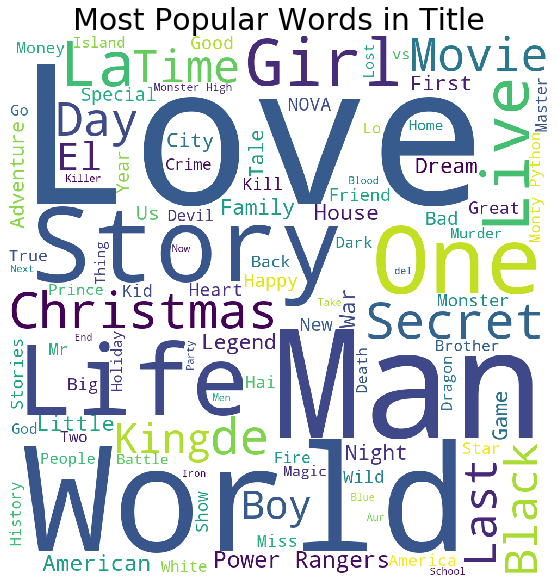

In [121]:
plt.rcParams['figure.figsize'] = (10, 10)
wordcloud = WordCloud(stopwords=STOPWORDS,background_color = 'white', width = 1000,  height = 1000, max_words = 100).generate(' '.join(df['title']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Words in Title',fontsize = 30)
plt.show()

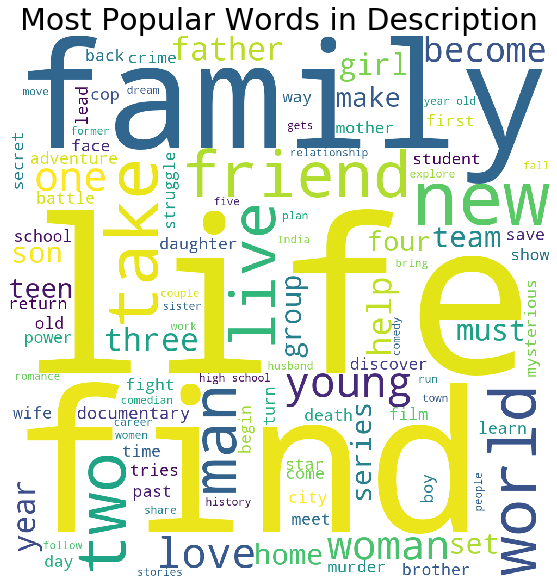

In [122]:
plt.rcParams['figure.figsize'] = (10, 10)
wordcloud = WordCloud(stopwords=STOPWORDS,background_color = 'white', width = 1000,  height = 1000, max_words = 100).generate(' '.join(df['description']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Words in Description',fontsize = 30)
plt.show()

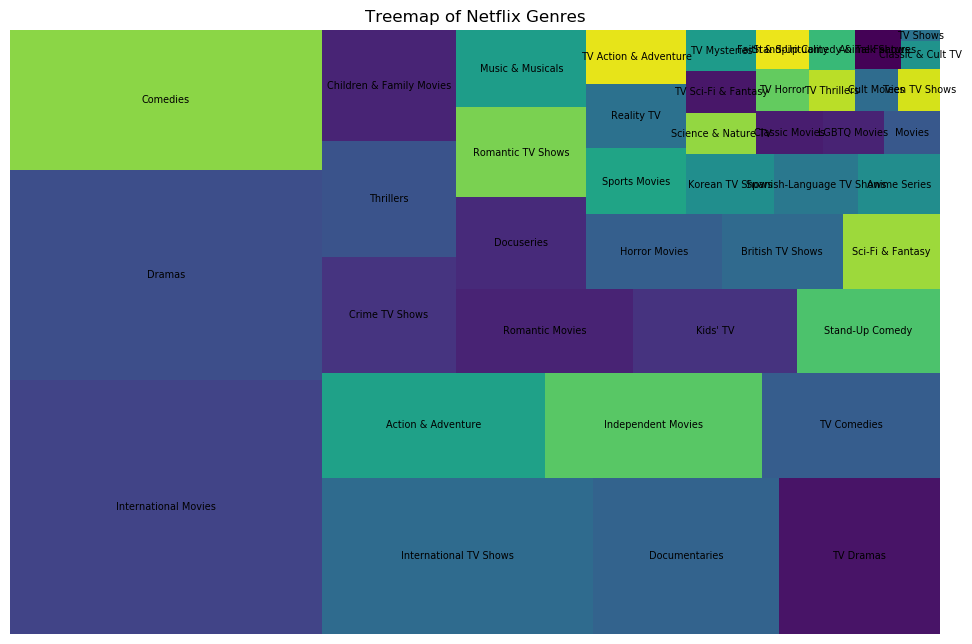

In [151]:
genre_str = ', '.join(df['listed_in'])
genre = pd.DataFrame(genre_str.split(', '))
genre.columns = ['Genre']
genre = genre.Genre.value_counts().reset_index()
genre.columns = ['Genre', 'Count']

sizes = np.array(genre.Count)
labels = genre.Genre
plt.figure(figsize=(12,8), dpi= 100)
squarify.plot(sizes=sizes, label=labels, text_kwargs={'fontsize':7})
plt.title('Treemap of Netflix Genres')
plt.axis('off')
plt.show()

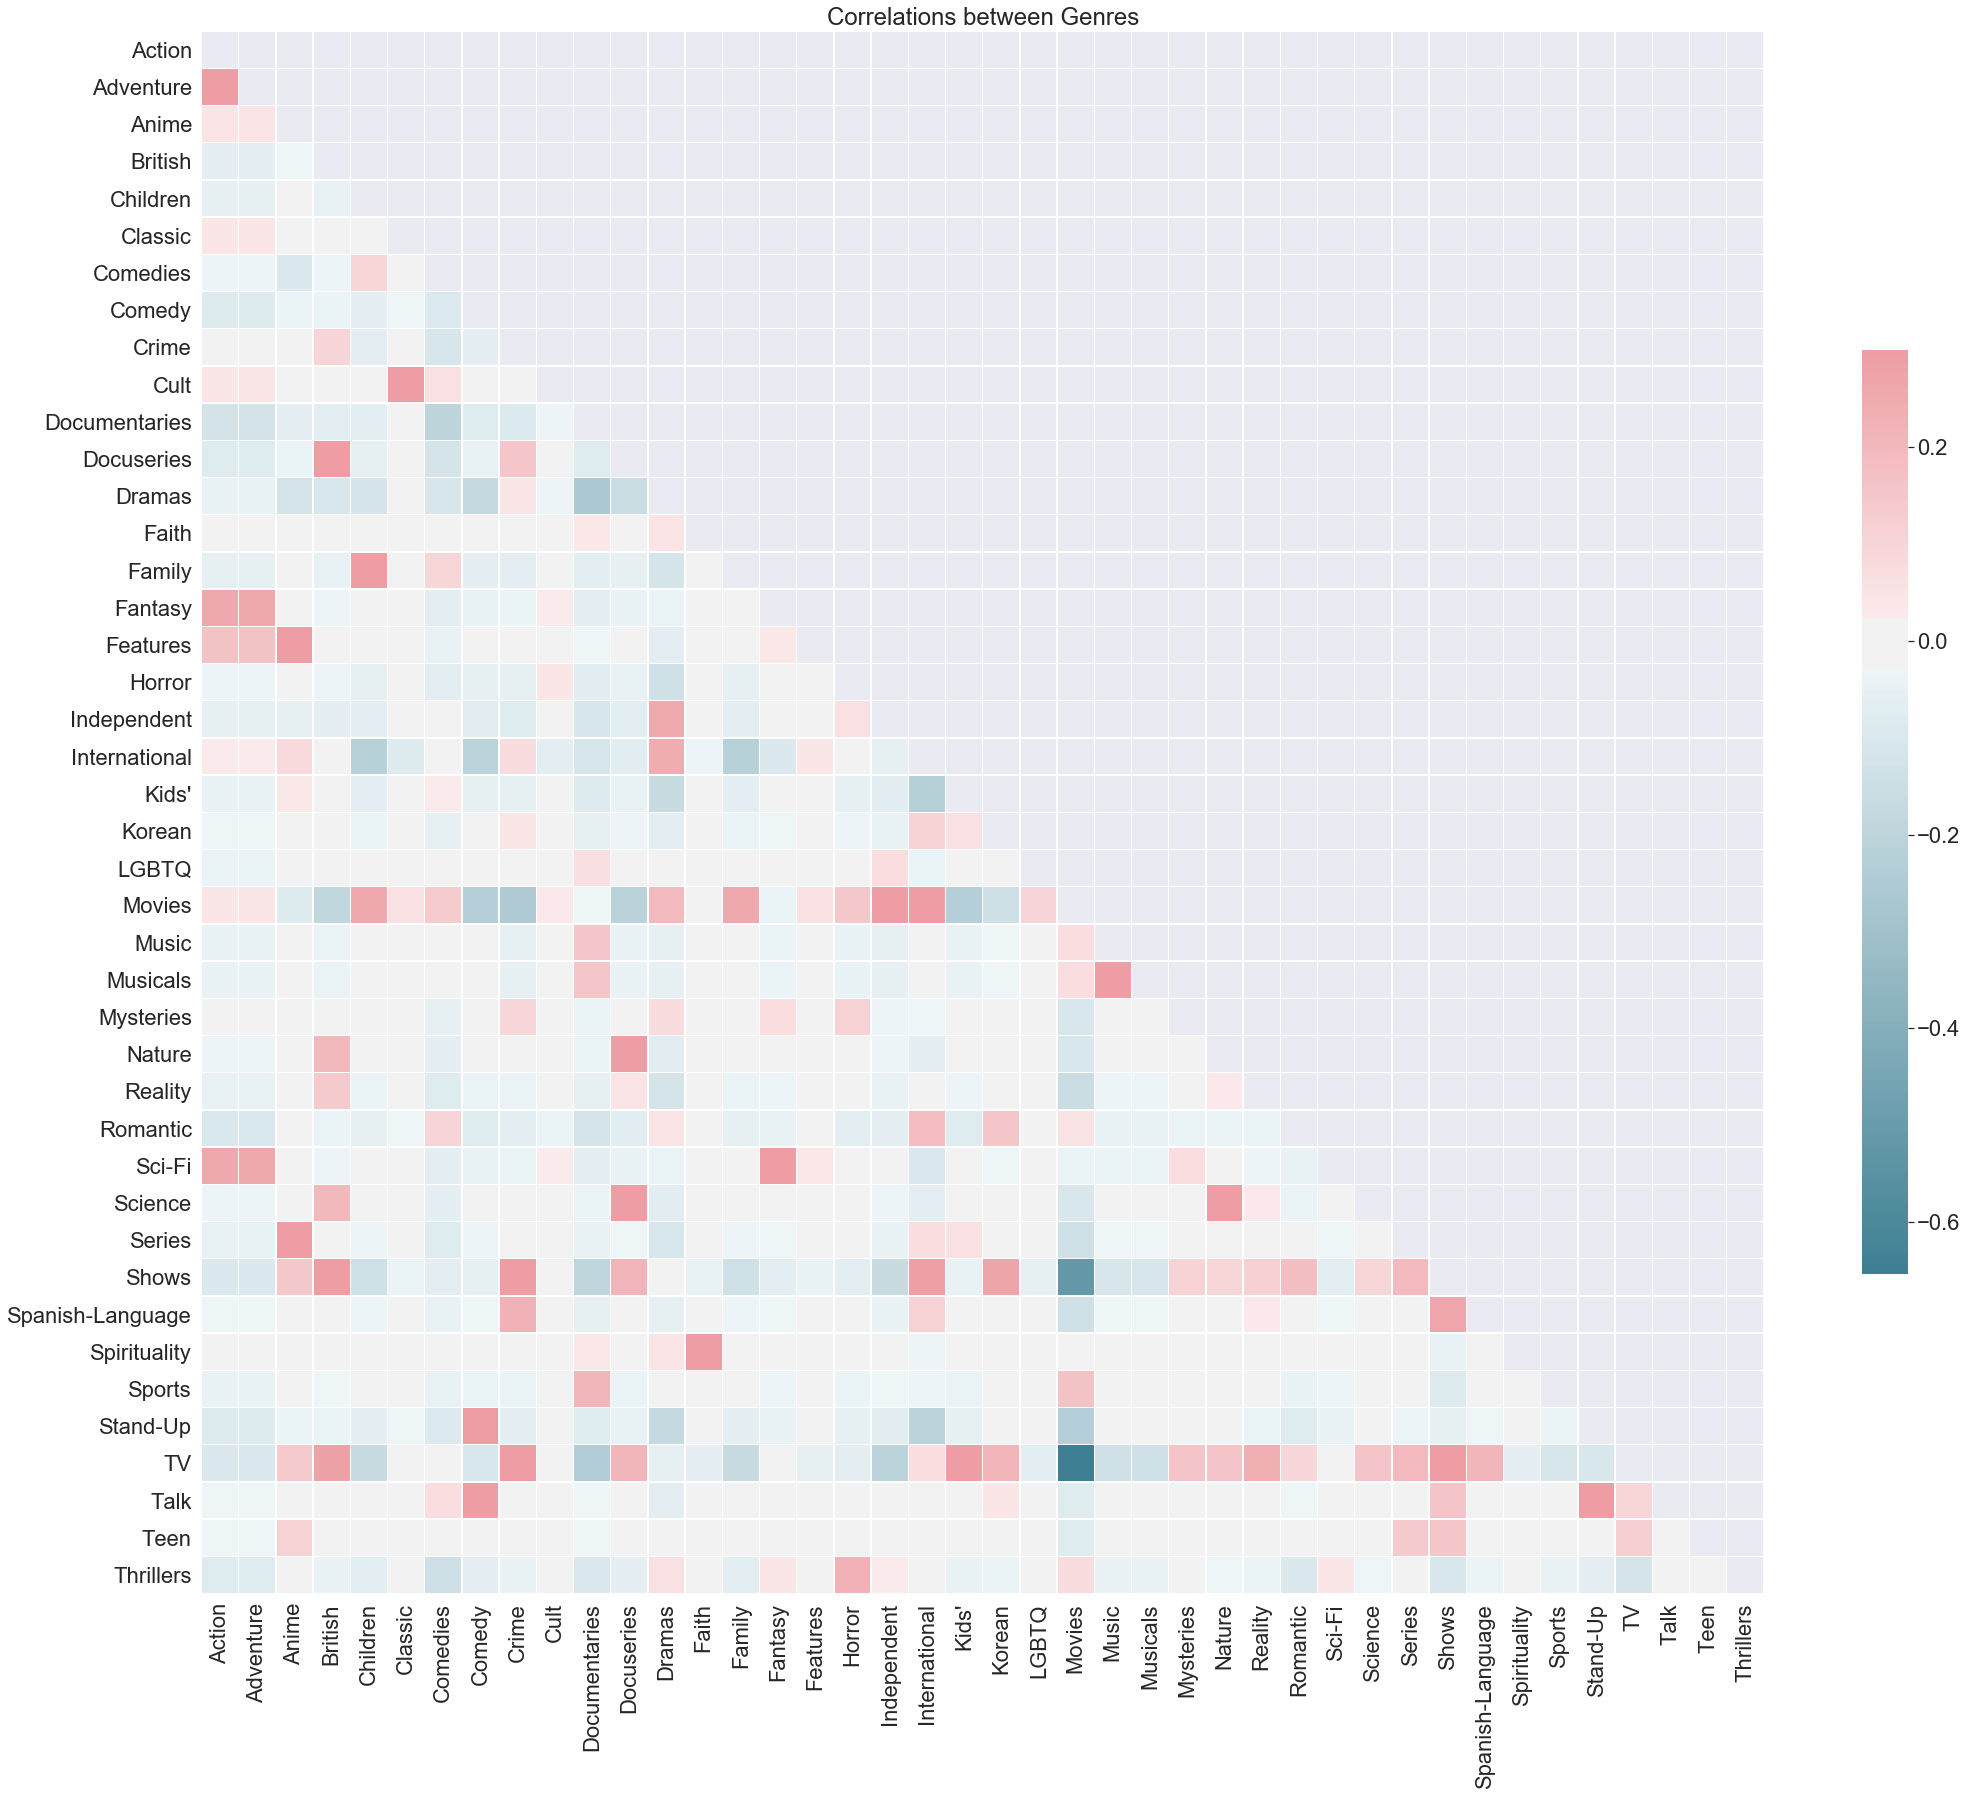

In [8]:
data= df['listed_in'].astype(str).apply(lambda s : s.replace('&',' ').replace(',', ' ').split()) 
mlb = MultiLabelBinarizer()
res = pd.DataFrame(mlb.fit_transform(data), columns=mlb.classes_)
corr = res.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(35, 34))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.clf()
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlations between Genres')
plt.show()

In [9]:
def create_corr_network(G, corr_direction, min_correlation):
    H = G.copy()
    for actor1, actor2, weight in G.edges(data=True):
        if corr_direction == "positive":
            if weight["weight"] <0 or weight["weight"] < min_correlation:
                H.remove_edge(actor1, actor2)
        else:
            if weight["weight"] >=0 or weight["weight"] > min_correlation:
                H.remove_edge(actor1, actor2)
                
    edges,weights = zip(*nx.get_edge_attributes(H,'weight').items())
    weights = tuple([(1+abs(x))**2 for x in weights])
    d = nx.degree(H)
    nodelist, node_sizes = zip(*d)
    positions=nx.circular_layout(H)
    
    plt.figure(figsize=(10,10), dpi=72)
    
    nx.draw_networkx_nodes(H,positions,node_color='#DA70D6',nodelist=nodelist,
                           node_size=tuple([x**2 for x in node_sizes]),alpha=0.8)
    
    nx.draw_networkx_labels(H, positions, font_size=10, 
                            font_family='sans-serif')
    
    if corr_direction == "positive": edge_colour = plt.cm.GnBu 
    else: edge_colour = plt.cm.PuRd
        
    nx.draw_networkx_edges(H, positions, edge_list=edges,style='solid',
                          width=weights, edge_color = weights, edge_cmap = edge_colour,
                          edge_vmin = min(weights), edge_vmax=max(weights))
    plt.axis('off')
    plt.show() 

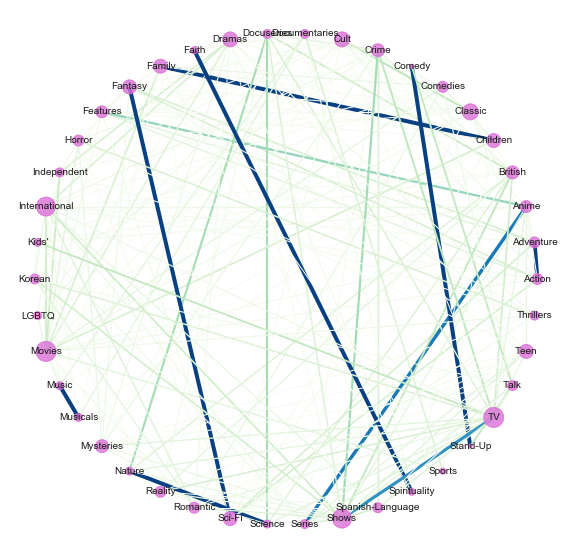

In [11]:
cat = corr.index.values
cor_matrix = np.asmatrix(corr)
G = nx.from_numpy_matrix(cor_matrix)
G = nx.relabel_nodes(G,lambda x: cat[x])
G.edges(data=True)
    
create_corr_network(G, 'positive', 0)

In the above chart, once can see the correlations/networks between the different genres.

In [155]:
dir1 = df[df.country=='United States']
dir1 = dir1.director.value_counts().nlargest(10).reset_index()
dir1.columns = ['Director', 'Count']

trace1 = go.Bar(x=dir1.Director, y=dir1.Count, marker=dict(color='rgb(0,0,139)'))
layout = go.Layout(template= "plotly_dark",title = 'Directors from US with Most Content ' , xaxis = dict(title = 'Director'), yaxis = dict(title = 'Count'))
fig = go.Figure(data=trace1, layout=layout)
fig.show()

In [156]:
dir1 = df[df.country=='India']
dir1 = dir1.director.value_counts().nlargest(10).reset_index()
dir1.columns = ['Director', 'Count']

trace1 = go.Bar(x=dir1.Director, y=dir1.Count, marker=dict(color='rgb(0,0,139)'))
layout = go.Layout(template= "plotly_dark",title = 'Directors from India with Most Content ' , xaxis = dict(title = 'Director'), yaxis = dict(title = 'Count'))
fig = go.Figure(data=trace1, layout=layout)
fig.show()

In [75]:
cast_str = ', '.join([str(i) for i in df[(df['cast'].notnull()) & (df.country=='United States')].cast])
cast = pd.DataFrame(cast_str.split(', '))
cast.columns = ['Actor']
cast = cast.Actor.value_counts().nlargest(10).reset_index()
cast.columns = ['Actor', 'Count']

trace1 = go.Bar(x=cast.Actor, y=cast.Count, marker=dict(color='rgb(153,255,153)'))
layout = go.Layout(template= "plotly_dark",title = 'American Actors with Most Content ' , xaxis = dict(title = 'Actor'), yaxis = dict(title = 'Count'))
fig = go.Figure(data=trace1, layout=layout)
fig.show()

**Networks between American Actors and Directors**

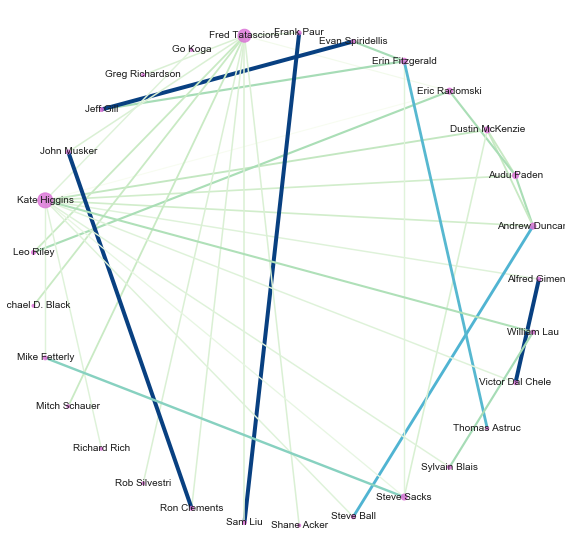

In [19]:
bold('**Networks between American Actors and Directors**')
actors = ['Fred Tatasciore', 'Erin Fitzgerald', 'Kate Higgins']
data = df[['cast', 'director']]
data = data.dropna()
data['Actor'] = 'Other'
for actor in actors:
    data.loc[data['cast'].str.contains(actor),'Actor'] = actor
data = data[data.Actor.str.contains('|'.join(actors))]
data['cast_director'] = data[['Actor', 'director']].apply(lambda x : ', '.join(x), axis=1)
data = data.cast_director.astype(str).apply(lambda x: x.split(', '))

mlb = MultiLabelBinarizer()
res = pd.DataFrame(mlb.fit_transform(data), columns=mlb.classes_)
corr = res.corr()

actors = corr.index.values
cor_matrix = np.asmatrix(corr)
G = nx.from_numpy_matrix(cor_matrix)
G = nx.relabel_nodes(G,lambda x: actors[x])
G.edges(data=True)

create_corr_network(G, 'positive', 0)

In [14]:
cast_str = ', '.join([str(i) for i in df[(df['cast'].notnull()) & (df.country=='India')].cast])
cast = pd.DataFrame(cast_str.split(', '))
cast.columns = ['Actor']
cast = cast.Actor.value_counts().nlargest(10).reset_index()
cast.columns = ['Actor', 'Count']

trace1 = go.Bar(x=cast.Actor, y=cast.Count, marker=dict(color='rgb(153,255,153)'))
layout = go.Layout(template= "plotly_dark",title = 'Indian Actors with Most Content ' , xaxis = dict(title = 'Actor'), yaxis = dict(title = 'Count'))
fig = go.Figure(data=trace1, layout=layout)
fig.show()

**Networks between Indian Actors and Directors**

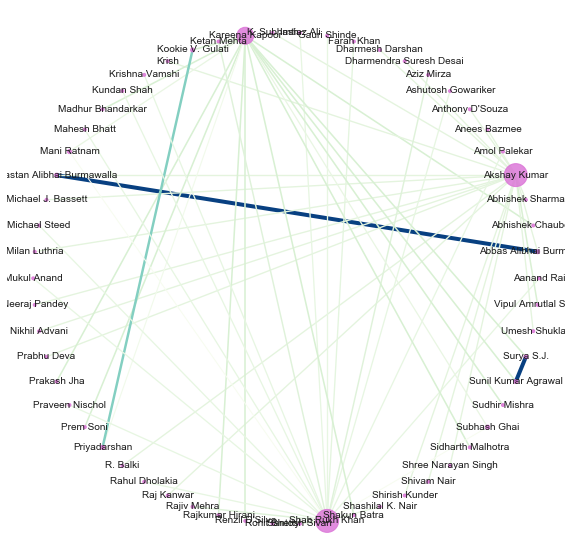

In [20]:
bold('**Networks between Indian Actors and Directors**')
actors = ['Kareena Kapoor', 'Shah Rukh Khan', 'Akshay Kumar']
data = df[['cast', 'director']]
data = data.dropna()
data['Actor'] = 'Other'
for actor in actors:
    data.loc[data['cast'].str.contains(actor),'Actor'] = actor
data = data[data.Actor.str.contains('|'.join(actors))]
data['cast_director'] = data[['Actor', 'director']].apply(lambda x : ', '.join(x), axis=1)
data = data.cast_director.astype(str).apply(lambda x: x.split(', '))

mlb = MultiLabelBinarizer()
res = pd.DataFrame(mlb.fit_transform(data), columns=mlb.classes_)
corr = res.corr()

actors = corr.index.values
cor_matrix = np.asmatrix(corr)
G = nx.from_numpy_matrix(cor_matrix)
G = nx.relabel_nodes(G,lambda x: actors[x])
G.edges(data=True)

create_corr_network(G, 'positive', 0)